<a href="https://colab.research.google.com/github/ahmedbilal1510/BetaAndCAPM_AnalysisAndVisualization/blob/main/Beta_and_CAPM_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Data and performing basic exploratory data analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
stocks_df = pd.read_csv(io.BytesIO(uploaded['stocks_dataset.csv']))
stocks_df

Saving stocks_dataset.csv to stocks_dataset (1).csv


,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,47.560001,44.900002,46.694286,131.509995,35.110001,18.580000,139.770004,1747.150024
1,11/8/2013,47.529999,41.650002,47.842857,133.490005,35.169998,19.090000,137.949997,1770.609985
2,11/11/2013,46.200001,42.900002,48.272858,132.529999,35.029999,19.200001,144.699997,1771.890015
3,11/12/2013,46.610001,41.900002,47.675713,132.330002,35.169998,19.260000,137.800003,1767.689941
4,11/13/2013,48.709999,42.599998,47.897144,133.169998,35.070000,19.700001,138.699997,1782.000000
...,...,...,...,...,...,...,...,...,...
1694,8/3/2020,251.960007,36.389999,498.619995,162.270004,29.620001,16.320000,1485.000000,3294.610107
1695,8/4/2020,249.830002,36.349998,509.640015,165.070007,30.010000,16.719999,1487.000000,3306.510010
1696,8/5/2020,249.119995,36.790001,502.109985,174.279999,29.850000,16.719999,1485.020020,3327.770020
1697,8/6/2020,265.279999,37.689999,509.079987,172.199997,29.840000,18.459999,1489.579956,3349.159912


In [ ]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


In [ ]:
stocks_df.describe()

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,135.966863,31.296698,195.423654,218.325633,35.296986,25.720865,311.299388,2413.219428
std,50.062473,11.508628,127.700712,98.968191,3.412142,5.200605,203.097452,424.825240
min,44.820000,14.010000,44.887142,95.010002,26.770000,7.140000,120.500000,1741.890015
25%,88.080002,19.600001,90.474998,132.840004,32.790001,21.935001,218.829994,2053.294921
50%,136.759995,31.610001,143.830002,158.289993,34.900002,25.879999,253.740005,2360.159912
75%,178.075005,38.229999,320.024993,334.360001,38.004999,29.250000,323.565002,2783.330078
max,268.440002,73.309998,548.729980,440.619995,43.470001,38.029999,1643.000000,3386.149902


**2. Performing Data Scaling**

In [ ]:
# Function to normalize the prices based on the initial price
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i] / x[i][0]
    return x


normalize(stocks_df)

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,11/8/2013,0.999369,0.927617,1.024598,1.015056,1.001709,1.027449,0.986979,1.013428
2,11/11/2013,0.971405,0.955457,1.033807,1.007756,0.997721,1.033369,1.035272,1.014160
3,11/12/2013,0.980025,0.933185,1.021018,1.006235,1.001709,1.036598,0.985905,1.011756
4,11/13/2013,1.024180,0.948775,1.025760,1.012623,0.998861,1.060280,0.992345,1.019947
...,...,...,...,...,...,...,...,...,...
1694,8/3/2020,5.297729,0.810468,10.678394,1.233899,0.843634,0.878364,10.624597,1.885705
1695,8/4/2020,5.252944,0.809577,10.914398,1.255190,0.854742,0.899892,10.638906,1.892516
1696,8/5/2020,5.238015,0.819376,10.753136,1.325222,0.850185,0.899892,10.624740,1.904685
1697,8/6/2020,5.577796,0.839421,10.902404,1.309406,0.849900,0.993541,10.657365,1.916927


**3. Performing Data Visualization**

In [ ]:
# Function to plot interactive plot
def interactive_plot(df, title):
    fig = px.line(title=title)
    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y=df[i], name=i)
    fig.show()

In [ ]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

4. Developing a function to calculate daily returns

In [ ]:
# Function to calculate the daily returns

def daily_return(df):
    df_daily_return = df.copy()

    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j] - df[i][j - 1]) / df[i][j - 1]) * 100

        df_daily_return[i][0] = 0
    return df_daily_return


In [ ]:
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11/8/2013,-0.063082,-7.238307,2.459768,1.505597,0.170883,2.744887,-1.302144,1.342756
2,11/11/2013,-2.798229,3.001200,0.898778,-0.719159,-0.398064,0.576223,4.893077,0.072293
3,11/12/2013,0.887446,-2.331002,-1.237020,-0.150907,0.399655,0.312495,-4.768482,-0.237039
4,11/13/2013,4.505467,1.670635,0.464452,0.634774,-0.284328,2.284533,0.653116,0.809534
...,...,...,...,...,...,...,...,...,...
1694,8/3/2020,-0.674101,-0.027481,1.992307,2.702534,0.135230,1.429459,3.790991,0.718102
1695,8/4/2020,-0.845374,-0.109923,2.210104,1.725521,1.316674,2.450974,0.134680,0.361193
1696,8/5/2020,-0.284196,1.210462,-1.477519,5.579446,-0.533156,0.000000,-0.133153,0.642974
1697,8/6/2020,6.486835,2.446311,1.388142,-1.193483,-0.033501,10.406699,0.307062,0.642770


**5. Calculating Beta for Tesla's stock (TSLA)**

In [ ]:
stocks_daily_return['TSLA']

0       0.000000
1      -1.302144
2       4.893077
3      -4.768482
4       0.653116
          ...   
1694    3.790991
1695    0.134680
1696   -0.133153
1697    0.307062
1698   -2.475194
Name: TSLA, Length: 1699, dtype: float64

In [ ]:
stocks_daily_return['sp500']

0       0.000000
1       1.342756
2       0.072293
3      -0.237039
4       0.809534
          ...   
1694    0.718102
1695    0.361193
1696    0.642974
1697    0.642770
1698    0.063303
Name: sp500, Length: 1699, dtype: float64

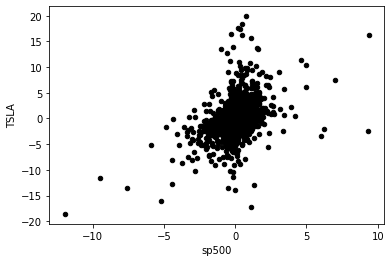

In [ ]:
stocks_daily_return.plot(kind ='scatter', x = 'sp500', y = 'TSLA', color = 'black')

In [ ]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', beta, alpha))  

Beta for TSLA stock is = 1.2359723602006571 and alpha is = 0.13716200993236846


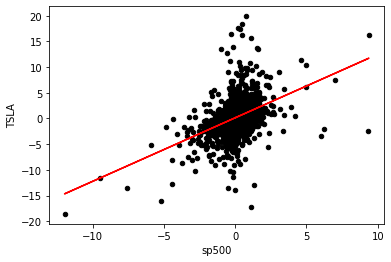

In [ ]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA', color = 'black')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')

**6. Applying the CAPM formula to an Individual Stock**

In [ ]:
beta

1.2359723602006571

In [ ]:
# Calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.04457361768265505

In [ ]:
# Calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['sp500'].mean() * 252
rm

11.232551656029074

In [ ]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Calculate return for any security (APPL) using CAPM  
ER_TSLA = rf + (beta * (rm-rf))
ER_TSLA

13.883123381378054

**7. Calculating Beta for all the Stocks**

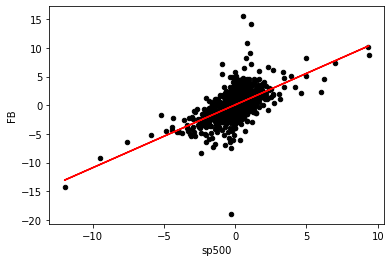

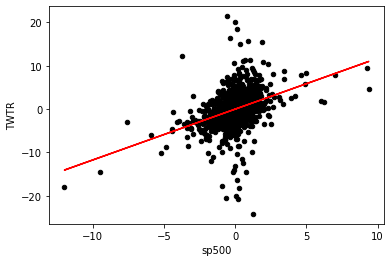

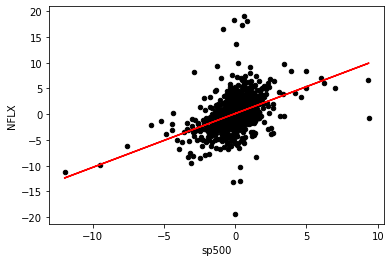

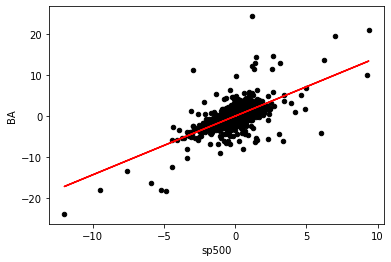

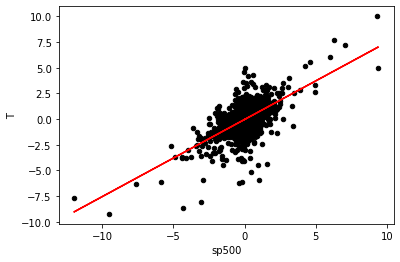

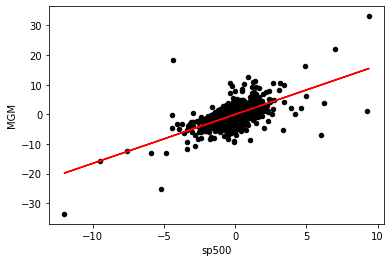

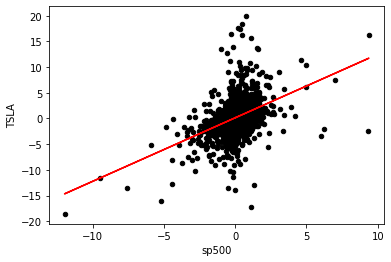

In [ ]:
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i, color = 'black')
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [ ]:
# Let's view Beta for every stock 
beta

{'BA': 1.4304608163084225,
 'FB': 1.0968490880203248,
 'MGM': 1.65171241479289,
 'NFLX': 1.0445724485449468,
 'T': 0.7523861924715601,
 'TSLA': 1.2359723602006571,
 'TWTR': 1.1723596183159934}

In [ ]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()